In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_profiling as ppr  
from fitter import Fitter 

In [67]:
%matplotlib inline

In [68]:
#leemos los datos
df_main = pd.read_csv('../data/day.csv')
df_hour = pd.read_csv('../data/hour.csv')

In [69]:
df_main.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [70]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [71]:
print(df_main.columns)
print(df_hour.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [72]:
print(df_main.shape)
print(df_hour.shape)

(731, 16)
(17379, 17)


In [73]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [74]:
df_hour['registered']

0         13
1         32
2         27
3         10
4          1
        ... 
17374    108
17375     81
17376     83
17377     48
17378     37
Name: registered, Length: 17379, dtype: int64

In [75]:
df_hour['season'].replace({1:'Primavera', 2:'verano', 3:'otoño', 4:'invierno'}, inplace=True)
df_hour.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Primavera,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Primavera,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [76]:
df_hour.groupby("season").mean()

,instant,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,
Primavera,6302.008015,0.512494,3.119755,11.648515,0.038661,3.008722,0.658652,1.460160,0.299147,0.298116,0.581348,0.215107,14.290901,96.823668,111.114569
invierno,11655.779301,0.495747,10.702505,11.522448,0.034026,2.979915,0.676749,1.472117,0.423138,0.415738,0.667124,0.170819,30.666824,168.202032,198.868856
otoño,9526.588968,0.501779,7.689724,11.507562,0.021352,3.033141,0.698621,1.330294,0.706410,0.656004,0.633167,0.171593,50.287144,185.729093,236.016237
verano,7287.727376,0.500340,4.654117,11.512134,0.021774,2.991608,0.695396,1.443638,0.544663,0.520547,0.627022,0.203410,46.160581,162.183488,208.344069


In [77]:
df_hour.groupby("season").count()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,,
Primavera,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242,4242
invierno,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232,4232
otoño,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496,4496
verano,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409


In [78]:
Grafico=df_hour.groupby("season")["registered"].count()

<AxesSubplot:title={'center':'Número de registros por estación'}, xlabel='season'>

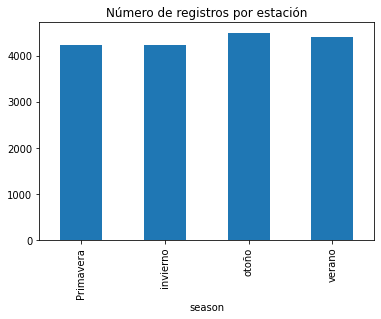

In [79]:
Grafico.plot.bar(title= "Número de registros por estación")